In [1209]:
import numpy as np
from scipy.special import owens_t
import matplotlib.pyplot as plt
# get a logger
import logging
logger = logging.getLogger(__name__)
from ERM import fair_adversarial_error_erm
from state_evolution import OverlapSet, fair_adversarial_error_overlaps
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Model Creation

In [1210]:
# Let's sample two random vectors in 2d from a normal distribution such that their norm is 1
helper = np.random.uniform(0, 2*np.pi)
theta = np.array([np.cos(helper), np.sin(helper)])
helper = np.random.uniform(helper-np.pi/2, helper+np.pi/2)
w = np.array([np.cos(helper), np.sin(helper)])
print("theta: ", theta)
print("w: ", w)

# # fix w to be exactly orthogonal to theta
# w = np.array([-theta[1], theta[0]])

# # fix w to be at a 45 degree angle to theta
# theta = np.array([-1, 1])
# theta = theta / np.linalg.norm(theta)
# w = np.array([0, 1])
# w = w / np.linalg.norm(w)


theta:  [ 0.97168389 -0.2362846 ]
w:  [ 0.99980166 -0.01991563]


In [1211]:
from data_model import VanillaGaussianDataModel
data_model = VanillaGaussianDataModel(2,logger,source_pickle_path="")
data_set = data_model.generate_data(10000,0)
X = data_set.X
X_original = X
d = 2
# We have our own teacher and must create the labels ourselves
y_teacher = np.sign(X.dot(theta)/np.sqrt(d))
y_student = np.sign(X.dot(w)/np.sqrt(d))

In [1212]:
# let us fix a gamma
gamma = 0.3

# gamma describes two lines having margin gamma away from the teacher

# let us fix an epsilon
epsilon = 0.5

# compute the overlaps
q = np.dot(w,w) / d
m = np.dot(theta,w) / d
rho = np.dot(theta,theta) / d


# epsilon*m/sqrt(d*q) describes another line parallel to the teacher

# Let us define a Sigma_upsilon
Sigma_upsilon = np.array([[1, 0], [0, 1]])

F = theta.dot(Sigma_upsilon@w) / d
A = w.dot(Sigma_upsilon@w) / d

# now epsilon*F/sqrt(2*q) describes another line parallel to the teacher



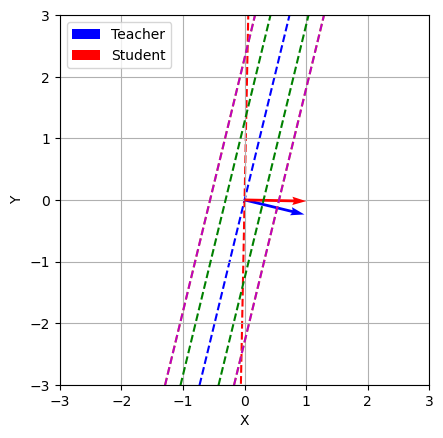

In [1213]:

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the vectors as solid lines with arrows
ax.quiver(0, 0, theta[0], theta[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Teacher', linewidth=1.5, zorder=2)
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='red', label='Student', linewidth=1.5, zorder=2)

lim = 3

# Plot the dashed lines for each vector
ax.plot([-lim, lim], [theta[0]*lim/theta[1],-theta[0]*lim/theta[1]], 'b--', zorder=1)
ax.plot([-lim, lim], [w[0]*lim/w[1],-w[0]*lim/w[1]], 'r--', zorder=1)

# plot the gamma dashed lines
ax.plot([-lim, lim], [theta[0]*lim/theta[1]-gamma/theta[1],-theta[0]*lim/theta[1]-gamma/theta[1]], 'g--', zorder=2)
ax.plot([-lim, lim], [theta[0]*lim/theta[1]+gamma/theta[1],-theta[0]*lim/theta[1]+gamma/theta[1]], 'g--', zorder=2)

# plot the epsilon*m/sqrt(q) dashed lines
ax.plot([-lim, lim], [theta[0]*lim/theta[1]-(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]-(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1]], 'y--', zorder=2)
ax.plot([-lim, lim], [theta[0]*lim/theta[1]+(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]+(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1]], 'y--', zorder=2)

# plot the (gamma + epsilon*F/sqrt(A) dash)/d line)s
ax.plot([-lim, lim], [theta[0]*lim/theta[1]-(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]-(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1]], 'm--', zorder=2)
ax.plot([-lim, lim], [theta[0]*lim/theta[1]+(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]+(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1]], 'm--', zorder=2)

# Set axis limits
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

# make the grid spacing rectangular
ax.set_aspect('equal', adjustable='box')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

# Show the plot
plt.grid()
plt.show()


In [1214]:
# Let's filter the points that fall between the gamma margin and the epsilon*F/sqrt(q) margin

teacher_margin = y_teacher * X.dot(theta) / np.sqrt(d)
mask_covariate_teacher = np.logical_and(teacher_margin > gamma, teacher_margin < gamma + epsilon*F/np.sqrt(q*d))

# only keep the labels that fall between the gamma margin and the epsilon*F/sqrt(q) margin
covariate_y_teacher = y_teacher[mask_covariate_teacher]
covariate_y_student = y_student[mask_covariate_teacher]
covariate_X = X[mask_covariate_teacher]

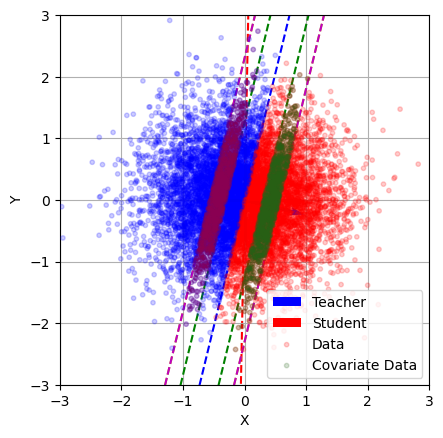

In [1215]:



# Create a figure and axis
fig, ax = plt.subplots()

# Plot the vectors as solid lines with arrows
ax.quiver(0, 0, theta[0], theta[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Teacher', linewidth=1.5, zorder=2)
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='red', label='Student', linewidth=1.5, zorder=2)

lim = 3

# Plot the dashed lines for each vector
ax.plot([-lim, lim], [theta[0]*lim/theta[1],-theta[0]*lim/theta[1]], 'b--', zorder=1)
ax.plot([-lim, lim], [w[0]*lim/w[1],-w[0]*lim/w[1]], 'r--', zorder=1)

# plot the gamma dashed lines
ax.plot([-lim, lim], [theta[0]*lim/theta[1]-gamma/theta[1],-theta[0]*lim/theta[1]-gamma/theta[1]], 'g--', zorder=2)
ax.plot([-lim, lim], [theta[0]*lim/theta[1]+gamma/theta[1],-theta[0]*lim/theta[1]+gamma/theta[1]], 'g--', zorder=2)

# plot the epsilon*m/sqrt(q) dashed lines
ax.plot([-lim, lim], [theta[0]*lim/theta[1]-(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]-(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1]], 'y--', zorder=2)
ax.plot([-lim, lim], [theta[0]*lim/theta[1]+(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]+(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1]], 'y--', zorder=2)

# plot the (gamma + epsilon*F/sqrt(A) dash)/d line)s
ax.plot([-lim, lim], [theta[0]*lim/theta[1]-(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]-(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1]], 'm--', zorder=2)
ax.plot([-lim, lim], [theta[0]*lim/theta[1]+(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]+(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1]], 'm--', zorder=2)


# Plot the data points
ax.scatter(X[:,0]/np.sqrt(d), X[:,1]/np.sqrt(d), c=y_teacher, cmap='bwr', s=10, label='Data', alpha=0.2, zorder=3)

# Plot the data points
ax.scatter(covariate_X[:,0]/np.sqrt(d), covariate_X[:,1]/np.sqrt(d), c=covariate_y_teacher, cmap='PiYG', s=10, label='Covariate Data', zorder=4, alpha=0.2)


# Set axis limits
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

# make the grid spacing rectangular
ax.set_aspect('equal', adjustable='box')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

# Show the plot
plt.grid()
plt.show()








In [1226]:
# Let us now perturb the data-points as we do in our code




X_attacked = gamma*y_teacher[:,np.newaxis] # n,2
print(X_attacked.shape)
X_attacked -= - X.dot(theta) / np.sqrt(d) # (n,2)


attack = np.sqrt(d)*gamma*y_teacher 
attack -= X.dot(theta) # (n,)
X_attacked = X + attack


# let's label them w.r.t theta
y_attacked_teacher = np.sign(X_attacked.dot(theta) / np.sqrt(d))

# Letps label them also w.r.t w
y_attacked_w = np.sign(X_attacked.dot(w) / np.sqrt(d))




covariate_y_attacked = y_attacked_teacher[mask_covariate_teacher]
covariate_X_attacked = X_attacked[mask_covariate_teacher]
covariate_y_attacked_w = y_attacked_w[mask_covariate_teacher]

(10000, 2)


ValueError: operands could not be broadcast together with shapes (10000,2) (10000,) 

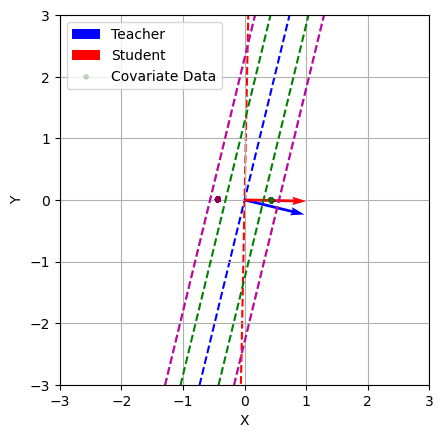

In [1223]:

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the vectors as solid lines with arrows
ax.quiver(0, 0, theta[0], theta[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Teacher', linewidth=1.5, zorder=2)
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='red', label='Student', linewidth=1.5, zorder=2)

lim = 3

# Plot the dashed lines for each vector
ax.plot([-lim, lim], [theta[0]*lim/theta[1],-theta[0]*lim/theta[1]], 'b--', zorder=1)
ax.plot([-lim, lim], [w[0]*lim/w[1],-w[0]*lim/w[1]], 'r--', zorder=1)

# plot the gamma dashed lines
ax.plot([-lim, lim], [theta[0]*lim/theta[1]-gamma/theta[1],-theta[0]*lim/theta[1]-gamma/theta[1]], 'g--', zorder=2)
ax.plot([-lim, lim], [theta[0]*lim/theta[1]+gamma/theta[1],-theta[0]*lim/theta[1]+gamma/theta[1]], 'g--', zorder=2)

# plot the epsilon*m/sqrt(q) dashed lines
ax.plot([-lim, lim], [theta[0]*lim/theta[1]-(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]-(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1]], 'y--', zorder=2)
ax.plot([-lim, lim], [theta[0]*lim/theta[1]+(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]+(gamma + epsilon*m/(np.sqrt(q*d)))/theta[1]], 'y--', zorder=2)

# plot the (gamma + epsilon*F/sqrt(A) dash)/d line)s
ax.plot([-lim, lim], [theta[0]*lim/theta[1]-(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]-(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1]], 'm--', zorder=2)
ax.plot([-lim, lim], [theta[0]*lim/theta[1]+(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1],-theta[0]*lim/theta[1]+(gamma + epsilon*F/(np.sqrt(q*d)))/theta[1]], 'm--', zorder=2)


# Plot the data points
ax.scatter(covariate_X_attacked[:,0]/np.sqrt(d), covariate_X_attacked[:,1]/np.sqrt(d), c=covariate_y_attacked, cmap='PiYG', s=10, label='Covariate Data', zorder=4, alpha=0.2)


# Set axis limits
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

# make the grid spacing rectangular
ax.set_aspect('equal', adjustable='box')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

# Show the plot
plt.grid()
plt.show()


In [1218]:
# compute the margins of the covariate_X_attacked[:,0]/np.sqrt(d)
control_teacher_margin = theta.dot(covariate_X_attacked.T) / np.sqrt(d)
# print unique values up to 3 decimal places
print(np.unique(np.round(control_teacher_margin, 3),return_counts=True))

(array([-0.424,  0.424]), array([1218, 1135]))


In [1219]:
# compute the directly attacked margins
attack_teacher_margin = theta.dot(X.T) / np.sqrt(d) + (F/F) * ( y_teacher * gamma - X.dot(theta) / np.sqrt(d) )
# attack_teacher_margin = attack_teacher_margin[mask_covariate_teacher]
# print unique values up to 3 decimal places
np.unique(np.round(attack_teacher_margin, 3), return_counts=True)

(array([-0.3,  0.3]), array([5122, 4878]))

In [1220]:
# Let's compute the ratio of wrongly classified points by the student
# for this we need to create new vectors based on the mask_covariate_teacher
y_teacher_empirical = np.zeros_like(y_teacher)
covariate_y_attacked_w_empirical = np.zeros(y_attacked_w.shape)
y_teacher_empirical[mask_covariate_teacher] = y_teacher[mask_covariate_teacher]
covariate_y_attacked_w_empirical[mask_covariate_teacher] = y_attacked_w[mask_covariate_teacher]
empirical_error = np.mean(covariate_y_attacked_w_empirical != y_teacher_empirical)

In [1221]:
# Now we want to compare this measure to our ERM and state evolution measures



# create an object with a property Sigma_upsilon
class DataModel:
    def __init__(self, Sigma_upsilon, rho):
        self.Sigma_upsilon = Sigma_upsilon
        self.rho = rho 

data_model = DataModel(Sigma_upsilon, rho)


overlaps = OverlapSet()
overlaps.A = A
overlaps.F = F 
overlaps.q = q
overlaps.m = m
overlaps.N = q

fair_error = fair_adversarial_error_erm(y_teacher, X_original, w,theta,epsilon,gamma,data_model)
print("Fair error: ", fair_error)


overlap_fair_error = fair_adversarial_error_overlaps(overlaps,data_model,gamma,epsilon)
print("Overlap fair error: ", overlap_fair_error)

print("Empirical error: ", empirical_error)

Fair error:  0.0102
Overlap fair error:  0.004898999800861718
Empirical error:  0.0
